# Scikit Learn Tutorial

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In this notebook, I will just demonstrate the basics of sklearn. I will implement a k-NN algorithm using sklearn dataset 'Iris'.

## $k$-Nearest Neighbours ($k$-NN)

[Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) contains three different types of irises: _Setosa_ (0.0), _Versicolour_ (1.0), and _Virginica_ (2.0) along with their sepal length-width and petal length-width features. 

In [2]:
from sklearn.datasets import load_iris    
# Load data set.
iris = load_iris()

# The previous data set is an array, change to a pandas dataframe.
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In order to apply any ML algorithm, we need to divide our dataset into Train and Test sets. Sometimes, we can have a validation test, depending on our data amount and objective. For purposes of this example, we will just have a Train Set consisisting of 80% of the data and a Test set of the remaining 20%. We do this using train_test_split from sklearn package. 

In [3]:
# Define our feature columns
feature_cols = ['sepal length (cm)', 
                'sepal width (cm)', 
                'petal length (cm)',
                'petal width (cm)']
X = iris_df.loc[:, feature_cols]

# Define our target column
y = iris_df.target

# Split the data into 80%-20% train-test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=14)

# Fit a $k$-NN model on the train split and evaluate the model on the splits. 
# The hyperparameter k is scikit-learn-s default value of 5.
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print('Train accuracy: ', model.score(X_train, y_train))
print('Test accuracy: ', model.score(X_test, y_test))

Train accuracy:  0.9666666666666667
Test accuracy:  0.9666666666666667


In the previous example, we set up k to be 5 and I said that was our first hyperparameter (a parameter whose value is defined before the learning process begins).

$k$-NN has two hyperparameters:
- the number of nearest neighbours ($k$)
- the definition of distance

That means that any data point's $k$ nearest neighbours will define how this new data point will be classified. As for the distance, we usually choose to work with the Euclidean distance, however, depending the scenario, we might want to rethink which metric we want to use.

When we want to find the best $k$ for this example, it might be worthy to experiment with possible $k$ values and see how they perform.

A tool that can help us find the best $k$ is cross-validation (A resampling procedure used to evaluate machine learning models on a limited data sample). 

In [4]:
from sklearn.model_selection import cross_val_score

In [5]:
avg_scores = []  
nfolds = 10
max_k = 50
k_neighs = range(1, max_k)

for k in k_neighs:
    model = KNeighborsClassifier(n_neighbors=k)
    avg_scores.append(np.mean(cross_val_score(model, X_train, y_train,
                                 cv=nfolds, scoring='accuracy')))

We can plot validation performance for different $k$ values and find what value of $k$ gives the best accuracy.

(0.9, 1.0)

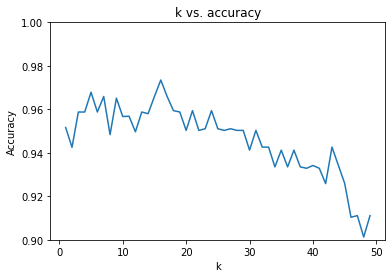

In [6]:
plt.plot(range(1, max_k), avg_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs. accuracy')
plt.ylim(0.90,1.0)

In [7]:
# Find the k that renders the best score.
best_k = k_neighs[np.argmax(avg_scores)]
best_k

16

In [8]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
print('Accuracy on the test set with k =', best_k, ' is ', model.score(X_test, y_test))

Accuracy on the test set with k = 16  is  0.9666666666666667
